#Mount drive from ggd(Use this one)

Run this before do other things


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


setup directory

In [ ]:
#setup your directory
semg_filter_dir = '/content/drive/MyDrive/Colab_Notebooks/sEMGDataset/filtered/csv/'
semg_raw_dir = '/content/drive/MyDrive/Colab_Notebooks/sEMGDataset/raw/csv/'

#Splitting Data from raw signal (Use this one)
(already finish)

This process is done

In [ ]:
#start splitting data

#this should be in grip folder
#span from 8000-20000, 276000-288000, 544000 - 556000, 812000-824000, 1080000-1092000
#loop through each raw signal (1_raw.csv to 40_raw.csv)

#look, relation ship number is increase by 12000 with 268000 interval start from 28000

#to split signal 

datarange = 12000
nextdata = 268000

#for rest(data start from 8000)
a=1
for x in range(1,41):
    startrow  = int(8000)
    rawsignalcsv = semg_filter_dir + str(x) + '_filtered.csv'
    #split signal into multiple folder
    #loop each different cycle(1-5)
    for i in range(5):
      df = pd.read_csv(rawsignalcsv,
                       header=None,
                       dtype=float,
                       skiprows=startrow,
                       nrows=12000)
      startrow+=nextdata
      out_csv = str(semg_filter_dir+'rest/'+str(a)+'.csv')
      df.to_csv(out_csv,index=False,header=False)
      a+=1

#for extension(data start from 28000)
a=1
for x in range(1,41):
    startrow  = int(28000)
    rawsignalcsv = semg_filter_dir + str(x) + '_filtered.csv'
    #split signal into multiple folder
    #loop each different cycle(1-5)
    for i in range(5):
      df = pd.read_csv(rawsignalcsv,
                       header=None,
                       dtype=float,
                       skiprows=startrow,
                       nrows=12000)
      startrow+=nextdata
      out_csv = str(semg_filter_dir+'extension/'+str(a)+'.csv')
      df.to_csv(out_csv,index=False,header=False)
      a+=1

#for flexion(data start from 48000)
a=1
for x in range(1,41):
    startrow  = 48000
    rawsignalcsv = semg_filter_dir + str(x) + '_filtered.csv'
    #split signal into multiple folder
    #loop each different cycle(1-5)
    for i in range(5):
      df = pd.read_csv(rawsignalcsv,
                      header=None,
                      dtype=float,
                      skiprows=startrow,nrows=12000)
      startrow+=nextdata
      out_csv = str(semg_filter_dir+'flexion/'+str(a)+'.csv')
      df.to_csv(out_csv,index=False,header=False)
      a+=1

#for grip(data start from 108000)
a=1
for x in range(1,41):
    startrow  = 108000
    rawsignalcsv = semg_filter_dir + str(x) + '_filtered.csv'
    #split signal into multiple folder
    #loop each different cycle(1-5)
    for i in range(5):
      df = pd.read_csv(rawsignalcsv,
                      header=None,
                      dtype=float,
                      skiprows=startrow,nrows=12000)
      startrow+=nextdata
      out_csv = str(semg_filter_dir+'grip/'+str(a)+'.csv')
      df.to_csv(out_csv,index=False,header=False)
      a+=1

#ANN (This one works)
Using tensorflow

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
gesture_name = ['rest','grip','extension','flexion'] # not use

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas

make raw signal array for data loading

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


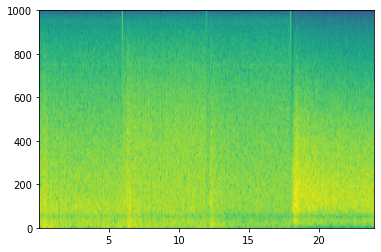

In [ ]:
#rawsignalcsv = semg_raw_dir + str(x) + '_raw.csv'
x_train = np.zeros([1,129,374])
y_train = []

for i in range(1,201):
    specx = np.transpose(np.genfromtxt(semg_filter_dir+'rest/'+ str(i)+'.csv',delimiter=",")).reshape(48000)
    datax,fqs,ts,Ax = plt.specgram(specx, Fs=2000)
    datay = 0
    x_train = np.append(x_train,[datax],axis=0)
    y_train = np.append(y_train,[datay],axis=0)

    specx = np.transpose(np.genfromtxt(semg_filter_dir+'grip/'+ str(i)+'.csv',delimiter=",")).reshape(48000)
    datax,fqs,ts,Ax = plt.specgram(specx, Fs=2000)
    datay = 1
    x_train = np.append(x_train,[datax],axis=0)
    y_train = np.append(y_train,[datay],axis=0)

    specx = np.transpose(np.genfromtxt(semg_filter_dir+'extension/'+ str(i)+'.csv',delimiter=",")).reshape(48000)
    datax,fqs,ts,Ax = plt.specgram(specx, Fs=2000)
    datay = 2
    x_train = np.append(x_train,[datax],axis=0)
    y_train = np.append(y_train,[datay],axis=0)

    specx = np.transpose(np.genfromtxt(semg_filter_dir+'flexion/'+ str(i)+'.csv',delimiter=",")).reshape(48000)
    datax,fqs,ts,Ax = plt.specgram(specx, Fs=2000)
    datay = 3
    x_train = np.append(x_train,[datax],axis=0)
    y_train = np.append(y_train,[datay],axis=0)

x_train=np.delete(x_train,0,0) #delete empty data

In [ ]:
x_train.shape

(800, 129, 374)

Titipat Achakulvisut2:11 PM
signal: x
X = spectogram(x)
X_resize = X.resize((1200, 300))
Titipat Achakulvisut2:12 PM
X_emg = np.vstack([X1, X2, X3, X4])
X_emg = np.vstack([X1, X2, X3, X4]).resize((300, 300))
Titipat Achakulvisut2:15 PM
signal: x filtered
https://biosppy.readthedocs.io/en/stable/

In [ ]:
print(x_train.shape)
print(y_train.shape)

(800, 129, 374)
(800,)


Case load model

In [ ]:
model = tf.keras.models.load_model(semg_filter_dir+'model/')

KeyboardInterrupt: ignored

Case: new nodel

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(129, 374)),
  tf.keras.layers.Dense(5000, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
repeatloop = 100    #run training for 2000 times
for a in range(repeatloop):
    hist = model.fit(x_train,y_train, epochs=20, batch_size=100) #train model
    trainaccuracy = hist.history.get('accuracy') #get accuracy float

    #print float in text file
    with open('/content/drive/MyDrive/Colab_Notebooks/sEMGDataset/raw/csv/acc/filter2acc.txt', 'a') as textfilewrite: #edit accuracy directory here
        for i in trainaccuracy:
            textfilewrite.write(str(i))
            textfilewrite.write('\n')

    model.save(semg_filter_dir+'model2/')   #save progress every 20 epochs
    print('loop number : '+str(a+1))



Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 2.1459 - accuracy: 0.2262
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 1.4456 - accuracy: 0.3525
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 1.1994 - accuracy: 0.4762
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 1.0476 - accuracy: 0.4550
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.9306 - accuracy: 0.4925
Epoch 6/20
8/8 [==============================] - 16s 2s/step - loss: 0.8652 - accuracy: 0.5700
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.8268 - accuracy: 0.5962
Epoch 8/20
8/8 [==============================] - 14s 2s/step - loss: 0.7943 - accuracy: 0.5987
Epoch 9/20
8/8 [==============================] - 13s 2s/step - loss: 0.7413 - accuracy: 0.6237
Epoch 10/20
8/8 [==============================] - 15s 2s/step - loss: 0.7063 - accuracy: 0.6488
Epoch 11/20
8/8 [======================